# Data lab 2 - Portfolio Optimization

#### Note 1: Review what you have learned in DataCamp assignments (e.g., Introduction to Portfolio Analysis in Python).
#### Note 2: To deep dive into what each function does, use the help function, e.g., run "help(npf.npv)." 

### 1. Craft an all-weather portfolio. Pick a portfolio of stocks following an investment theme that has stood and will stand the test of time. Extract the data from Yahoo Finance and explore the statistical distribution of each stock's past 5-year returns.

In [164]:
# Import the necessary packages
import yfinance as yf
import datetime as dt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

symbols_list = ["AAPL", "AMZN", "GOOG", "BP", "KMI", "BABA", "TCEHY", "BYDDY", "TSLA", "JPM"] ## List of stocks picked

start = dt.datetime(2017,8,31)      ## Specify the starting point of historical price
end = dt.datetime(2022,8,31)      ## Specify the ending point of historical price

df = yf.download(symbols_list, start=start, end=end)      ## Download the price data

print(df.head())      ## Print the head of the dataframe to check the column names

[*********************100%***********************]  10 of 10 completed
            Adj Close                                                          \
                 AAPL       AMZN        BABA         BP      BYDDY       GOOG   
Date                                                                            
2017-08-30  38.757465  48.379501  171.250000  25.691235  11.919320  46.478500   
2017-08-31  38.911682  49.029999  171.740005  25.960331  11.830296  46.966499   
2017-09-01  38.923546  48.912498  171.039993  25.990234  11.850078  46.867001   
2017-09-05  38.456131  48.263500  169.919998  26.124777  11.721489  46.422501   
2017-09-06  38.415798  48.389999  168.139999  26.401352  11.919320  46.390499   

                                                        ...     Volume  \
                  JPM        KMI      TCEHY       TSLA  ...       AAPL   
Date                                                    ...              
2017-08-30  79.233101  14.443094  41.306946  23.545334  ..

In [165]:
# Keep only the adjusted close in the dataframe
# Note that the date is in the index
price = df["Adj Close"]

# Calculate return using method pct_change
pct_return = price.pct_change()

# deep dive into the first five rows of observations in the dataframe
print(pct_return.head(5))

                AAPL      AMZN      BABA        BP     BYDDY      GOOG  \
Date                                                                     
2017-08-30       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-31  0.003979  0.013446  0.002861  0.010474 -0.007469  0.010499   
2017-09-01  0.000305 -0.002396 -0.004076  0.001152  0.001672 -0.002119   
2017-09-05 -0.012009 -0.013269 -0.006548  0.005177 -0.010851 -0.009484   
2017-09-06 -0.001049  0.002621 -0.010476  0.010587  0.016878 -0.000689   

                 JPM       KMI     TCEHY      TSLA  
Date                                                
2017-08-30       NaN       NaN       NaN       NaN  
2017-08-31 -0.004600  0.013633  0.009540  0.007701  
2017-09-01  0.008912  0.001552 -0.007796 -0.001405  
2017-09-05 -0.023882 -0.000517 -0.025476 -0.016348  
2017-09-06  0.006703 -0.001034  0.020278 -0.014474  


In [166]:
des = pd.DataFrame()
# Print the daily return mean of each asset
mean = pct_return.mean(axis=0)
des['mean'] = mean

# Print the daily return standard deviation of each asset
std = pct_return.std(axis=0)
des['standard dev.'] = std

# Print the skewness of each asset 

skew = pct_return.skew(axis=0)
des['skewness'] = skew

# Print the kurtosis of each asset
kurt = pct_return.kurtosis(axis=0)
des['kurtosis'] = kurt

print(des.transpose())

                   AAPL      AMZN       BABA         BP     BYDDY      GOOG  \
mean           0.001328  0.001013  -0.000077   0.000424  0.001928  0.000861   
standard dev.  0.020289  0.021663   0.028686   0.022957  0.034618  0.018808   
skewness      -0.098676  0.106445   1.776765   0.026475  0.785120 -0.001428   
kurtosis       5.098170  5.197694  23.419272  15.559995  3.769775  4.186795   

                     JPM        KMI      TCEHY      TSLA  
mean            0.000488   0.000405   0.000321  0.002769  
standard dev.   0.019834   0.020267   0.026622  0.040235  
skewness        0.371324  -1.039888   1.474107  0.230353  
kurtosis       13.860407  20.822206  20.045539  4.013923  


### 2. Build an equally-weighted all-weather portfolio of your stock picks. Then, deep dive into the return characteristics of the portfolio (i.e., annualized portfolio return and volatility, portfolio's Sharpe ratio, portfolio's daily return profile - mean, volatility, skewness, kurtosis). Finally, draw the cumulative return of your all-weather portfolio for the past five years.

############## Overview ##############
The first few rows of the portfolio's daily rturn is:
Date
2017-08-30         NaN
2017-08-31    0.006007
2017-09-01   -0.000420
2017-09-05   -0.011321
2017-09-06    0.002935
Name: All-Weather, dtype: float64


############## RETURN PROFILE ##############
Mean                     0.000900
Volatility               0.016900
Skewness                -0.333800
Kurtosis                 6.962500
Annualized Return        0.224000
Annualized Volatility    0.266541
Sharpe Ratio             0.720300
Name: All-Weather, dtype: float64


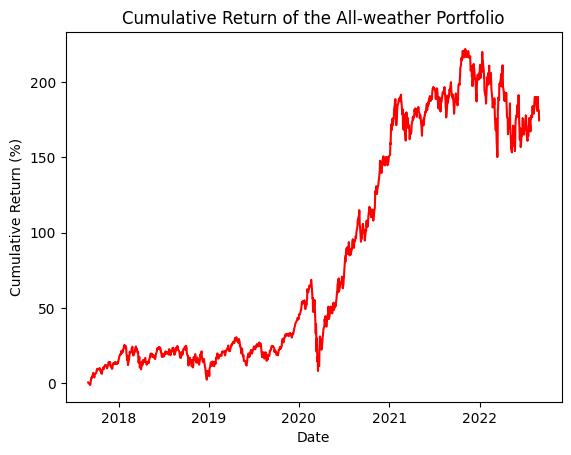

In [167]:
## Equal weights for the portfolio
weight = np.array([0.1])
for i in np.arange(0, 9):
    weight = np.append(weight, 0.1)

## Calculate annual expected portfolio performance
pct_return['All-Weather'] = pct_return.dot(weight)

class Performance_Summary:
    '''
    Here I defined a class object that contains all the descriptive statistics for the performance.
    The same output can also be realized by individual functions, but the class allows me to call the attributes more easily.

    INPUTS:

    return_series: A pandas Series objects that contains the daily return of the portfolio/security
    num_yrs: The number of years that the return data covers, used to calculate the annualized return/volatility
    num_digi: The number of digits to keep after the decimal for the output. The default setting is 4.
    risk_free: The risk free rate used to calculate the Sharpe ratio. The default setting is 0.032

    ATTRIBUTES:
        Mean, standard deviation, skewness, kurtosis, annualized return, annualized standard deviation, Sharpe ratio

        Summary of all statistics above

        Plot of the cumulative return over the horizon

    '''


    def __init__(self, return_series, num_yrs, num_digi=4, risk_free=0.032):
        self.return_series = return_series
        self.num_yrs = num_yrs
        self.num_digi = num_digi
        self.risk_free = risk_free

    def mean(self):
        return round(self.return_series.mean(), self.num_digi)

    def std(self):
        return round(self.return_series.std(), self.num_digi)

    def skew(self):
        return round(self.return_series.skew(), self.num_digi)

    def kurt(self):
        return round(self.return_series.kurtosis(), self.num_digi)

    def annualized_return(self):
        total = (1 +self.return_series).cumprod()[-1] - 1
        annual = (1 + total)**(1/self.num_yrs) - 1
        return round(annual, self.num_digi)

    def annualized_std(self):
        return self.return_series.std() * np.sqrt(250)

    def Sharpe(self, sharpe):
        if sharpe:
            return round((self.annualized_return() - self.risk_free)/self.annualized_std(), self.num_digi)
        else:
            return None

    def plot(self, title):
        cum_return = (1+self.return_series).cumprod() - 1
        plt.plot(cum_return.index, cum_return * 100, color='red')

        plt.xlabel('Date')
        plt.ylabel('Cumulative Return (%)')
        plt.title(title)

        plt.show()

    def summary(self, sharpe, prt=False):
        array = pd.Series([self.mean(), self.std(), self.skew(), self.kurt(),
                          self.annualized_return(), self.annualized_std(), self.Sharpe(sharpe)],
                          index=['Mean', 'Volatility', 'Skewness', 'Kurtosis', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio']).dropna().rename(self.return_series.name)

        if prt:
            print('\n')
            print('############## RETURN PROFILE ##############')
            print(array)

        return array

def compare(returndf):
    i = 0
    for col in returndf:

        cum_return = (1 + returndf[col]).cumprod() - 1
        plt.plot(cum_return.index, cum_return * 100, label=col)

        if i == 0:
            summary_df = pd.DataFrame(Performance_Summary(returndf[col], 5).summary(sharpe=True, prt=False))
        else:
            performance = pd.DataFrame(Performance_Summary(returndf[col], 5).summary(sharpe=True, prt=False))
            summary_df = pd.concat([summary_df, performance], axis=1)

        i = i + 1

    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.legend()

    plt.show()

    print(summary_df)

## Output an overview of the two sets of returns
print('############## Overview ##############')
print("\033[4m" + 'The first few rows of the portfolio\'s daily rturn is:' + "\033[0m")
print(pct_return['All-Weather'].head())

############ Daily Return Features ############
all_weather_profile = Performance_Summary(pct_return['All-Weather'], 5)

all_weather_profile.summary(sharpe=True, prt=True)

all_weather_profile.plot('Cumulative Return of the All-weather Portfolio')

### 3. Repeat (2) but with the maximum Sharpe portfolio and minimum volatility portfolio.

############## Overview ##############
The first few rows of the portfolio's daily return is:
Date
2017-08-30         NaN
2017-08-31    0.003172
2017-09-01    0.000036
2017-09-05   -0.013071
2017-09-06   -0.001980
Name: Sharpe Optimal, dtype: float64


############## RETURN PROFILE ##############
Mean                     0.001800
Volatility               0.022300
Skewness                -0.246300
Kurtosis                 3.689500
Annualized Return        0.493000
Annualized Volatility    0.352283
Sharpe Ratio             1.308600
Name: Sharpe Optimal, dtype: float64


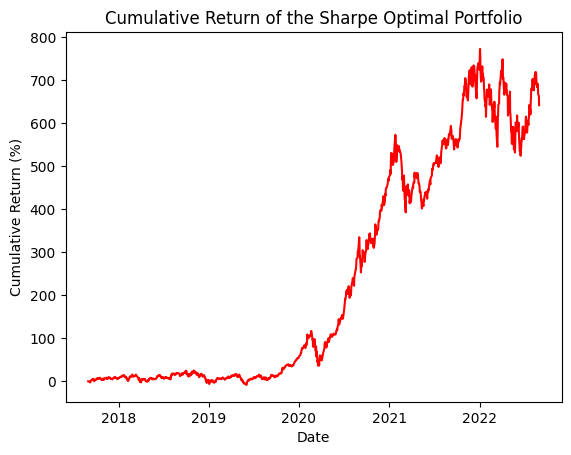

In [168]:
# Import the packages
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns mu
mu = expected_returns.mean_historical_return(price)

# Calculate the covariance matrix sigma
sigma = risk_models.sample_cov(price)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

############## Maximum Sharpe Ratio Portfolio ##############
raw_weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()

pct_return['Sharpe Optimal'] = 0

for columns in pct_return:
    if columns != 'All-Weather' and columns != 'Sharpe Optimal' and columns != 'Volatility Optimal':
        pct_return['Sharpe Optimal'] = pct_return['Sharpe Optimal'] + pct_return[columns] * cleaned_weights[columns]

#####################
## Redo Everything ##
#####################

## Output an overview of the two sets of returns
print('############## Overview ##############')
print("\033[4m" + 'The first few rows of the portfolio\'s daily return is:' + "\033[0m")
print(pct_return['Sharpe Optimal'].head())

############ Daily Return Features ############
sharpe_profile = Performance_Summary(pct_return['Sharpe Optimal'], 5)

sharpe_profile.summary(sharpe=True, prt=True)

sharpe_profile.plot('Cumulative Return of the Sharpe Optimal Portfolio')


############## Overview ##############
The first few rows of the portfolio's daily return is:
Date
2017-08-30         NaN
2017-08-31    0.008547
2017-09-01    0.000432
2017-09-05   -0.011304
2017-09-06    0.003881
Name: Volatility Optimal, dtype: float64


############## RETURN PROFILE ##############
Mean                     0.000700
Volatility               0.015100
Skewness                -0.682600
Kurtosis                 9.759400
Annualized Return        0.151900
Annualized Volatility    0.237967
Sharpe Ratio             0.503900
Name: Volatility Optimal, dtype: float64


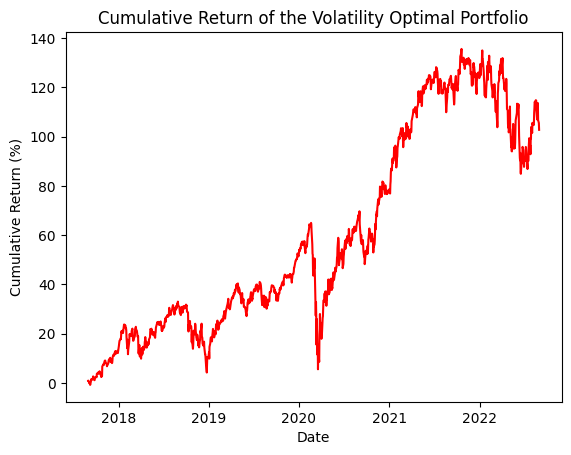

In [169]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

############## Minimum Volatility Portfolio ##############
raw_weights = ef.min_volatility()

cleaned_weights = ef.clean_weights()

pct_return['Volatility Optimal'] = 0

for columns in pct_return:
    if columns != 'All-Weather' and columns != 'Volatility Optimal' and columns != 'Sharpe Optimal':
        pct_return['Volatility Optimal'] = pct_return['Volatility Optimal'] + pct_return[columns] * cleaned_weights[columns]

#####################
## Redo Everything ##
#####################

## Output an overview of the two sets of returns
print('############## Overview ##############')
print("\033[4m" + 'The first few rows of the portfolio\'s daily return is:' + "\033[0m")
print(pct_return['Volatility Optimal'].head())

############ Daily Return Features ############
volatility_profile = Performance_Summary(pct_return['Volatility Optimal'], 5)

volatility_profile.summary(sharpe=True, prt=True)

volatility_profile.plot('Cumulative Return of the Volatility Optimal Portfolio')



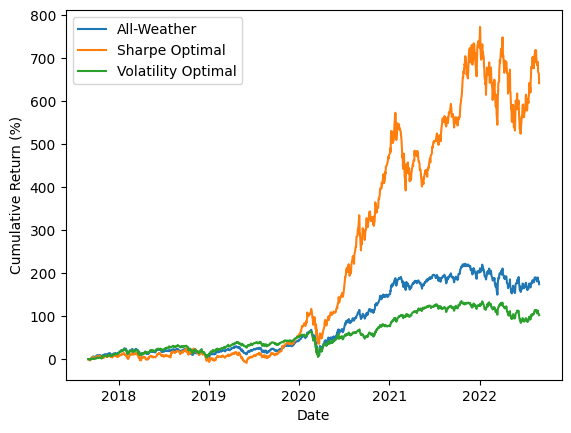

                       All-Weather  Sharpe Optimal  Volatility Optimal
Mean                      0.000900        0.001800            0.000700
Volatility                0.016900        0.022300            0.015100
Skewness                 -0.333800       -0.246300           -0.682600
Kurtosis                  6.962500        3.689500            9.759400
Annualized Return         0.224000        0.493000            0.151900
Annualized Volatility     0.266541        0.352283            0.237967
Sharpe Ratio              0.720300        1.308600            0.503900


In [170]:
compare(pct_return[['All-Weather', 'Sharpe Optimal', 'Volatility Optimal']])

### 4. [Optional Bonus] With PyPortfolioOpt, how can you further improve your all-weather portfolio construction? Hint: The Black-Litterman model (https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html) to express subjective views and L2 regularisation to alleviate extreme portfolio allocation (i.e., weights).

C:\Users\Qiaozheng Lu\Desktop\S01\S01_Assignments\BMF 5324\Individual Data Lab 1 (Practice) - Financial Concepts\venv\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


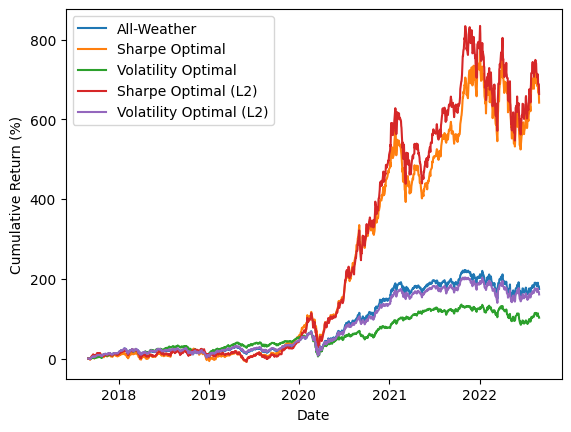

                       All-Weather  Sharpe Optimal  Volatility Optimal  \
Mean                      0.000900        0.001800            0.000700   
Volatility                0.016900        0.022300            0.015100   
Skewness                 -0.333800       -0.246300           -0.682600   
Kurtosis                  6.962500        3.689500            9.759400   
Annualized Return         0.224000        0.493000            0.151900   
Annualized Volatility     0.266541        0.352283            0.237967   
Sharpe Ratio              0.720300        1.308600            0.503900   

                       Sharpe Optimal (L2)  Volatility Optimal (L2)  
Mean                              0.001900                   0.0009  
Volatility                        0.023500                   0.0165  
Skewness                         -0.094100                  -0.3836  
Kurtosis                          3.110000                   7.3852  
Annualized Return                 0.501600               

In [171]:
from pypfopt import objective_functions

## L2 regularization attempt

# Sharpe Ratio Maximization

ef = EfficientFrontier(mu, sigma)

ef.add_objective(objective_functions.L2_reg, gamma=2)

ef.max_sharpe()
cleaned_weights = ef.clean_weights()

pct_return['Sharpe Optimal (L2)'] = 0

for columns in pct_return:
    if columns != 'All-Weather' and columns != 'Sharpe Optimal' and columns != 'Volatility Optimal' \
            and columns != 'Sharpe Optimal (L2)':
        pct_return['Sharpe Optimal (L2)'] = pct_return['Sharpe Optimal (L2)'] + pct_return[columns] * cleaned_weights[columns]


# Volatility Minimization
ef = EfficientFrontier(mu, sigma)

ef.add_objective(objective_functions.L2_reg, gamma=2)

ef.min_volatility()
cleaned_weights = ef.clean_weights()

pct_return['Volatility Optimal (L2)'] = 0

for columns in pct_return:
    if columns != 'All-Weather' and columns != 'Volatility Optimal' and columns != 'Sharpe Optimal' \
            and columns != 'Sharpe Optimal (L2)' and columns != 'Volatility Optimal (L2)':
        pct_return['Volatility Optimal (L2)'] = pct_return['Volatility Optimal (L2)'] + pct_return[columns] * cleaned_weights[columns]

compare(pct_return[['All-Weather', 'Sharpe Optimal', 'Volatility Optimal', 'Sharpe Optimal (L2)', 'Volatility Optimal (L2)']])


# By changing the optimization algo to use the L2 regularization, the maximization of the sharpe ratio is not working as expected.
# The output portfolio turns out to be worse than the previous one.
#
# Using L2 regularization to minimize the volatility can help improve the sharpe ratio.







                 AAPL       AMZN        BABA         BP      BYDDY       GOOG  \
Date                                                                            
2017-08-30  38.757465  48.379501  171.250000  25.691235  11.919320  46.478500   
2017-08-31  38.911682  49.029999  171.740005  25.960331  11.830296  46.966499   
2017-09-01  38.923546  48.912498  171.039993  25.990234  11.850078  46.867001   
2017-09-05  38.456131  48.263500  169.919998  26.124777  11.721489  46.422501   
2017-09-06  38.415798  48.389999  168.139999  26.401352  11.919320  46.390499   
...               ...        ...         ...        ...        ...        ...   
2020-02-25  70.841148  98.637001  205.610001  28.576866  12.789244  69.422501   
2020-02-26  71.964951  98.979500  208.740005  28.359911  13.198261  69.658997   
2020-02-27  67.260735  94.214996  205.029999  27.361935  12.589725  65.904503   
2020-02-28  67.221375  94.187500  208.000000  27.153662  12.140804  66.966499   
2020-03-02  73.479744  97.69

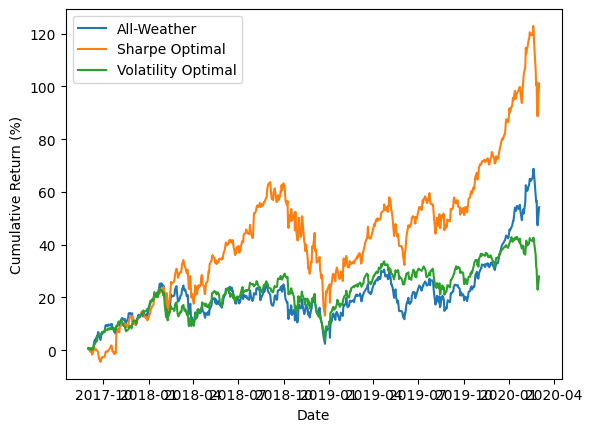

                       All-Weather  Sharpe Optimal  Volatility Optimal
Mean                      0.000800        0.001200            0.000400
Volatility                0.012900        0.015400            0.010200
Skewness                 -0.169300        0.023400           -0.302100
Kurtosis                  1.830000        3.594800            2.514000
Annualized Return         0.090500        0.150000            0.050700
Annualized Volatility     0.204311        0.243872            0.162028
Sharpe Ratio              0.286300        0.483900            0.115400


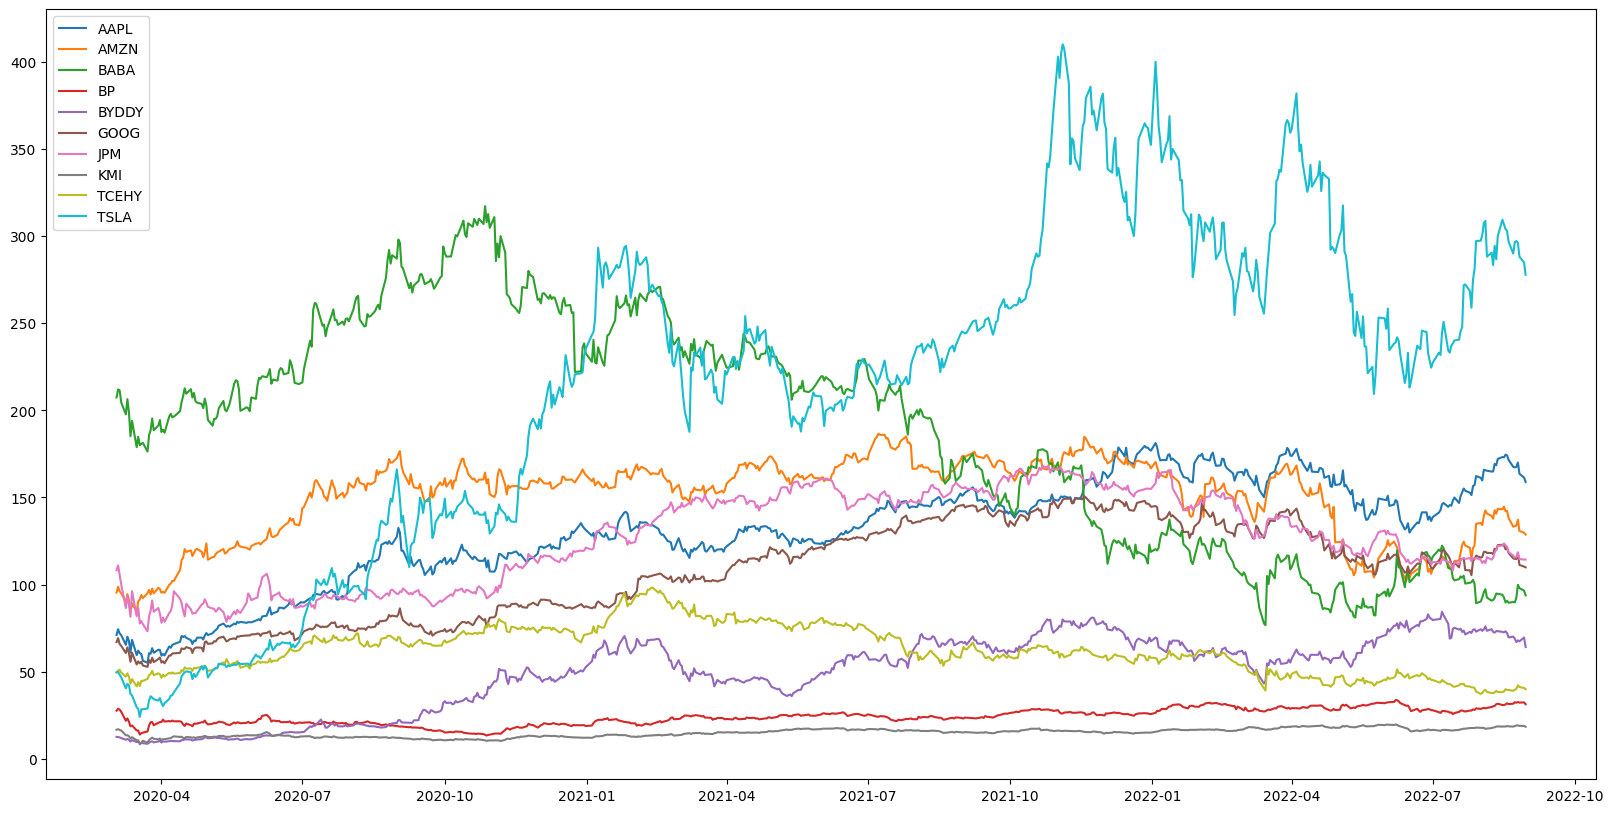

In [199]:
## Black-Litterman attempt
from pypfopt import black_litterman, risk_models
from pypfopt.black_litterman import BlackLittermanModel

# For the Black-Litterman model, I would use a back-testing tradition by splitting the sample into two equal parts.
# The first half acts as the historical data. The second half is the testing sample.
# Based on observations on the second half, I generate my objective 'view' on the stocks.
# The views are then used as modification inputs to the model.

historical_set = price.iloc[0: int(len(price)/2), :]
print(historical_set)
future_set = price.iloc[int(len(price)/2): , :]

historical_return = historical_set.pct_change()
future_return = future_set.pct_change()

## All-Weather

## Equal weights for the portfolio
weight = np.array([0.1])
for i in np.arange(0, 9):
    weight = np.append(weight, 0.1)

## Calculate annual expected portfolio performance
historical_return['All-Weather'] = historical_return.dot(weight)
future_return['All-Weather'] = future_return.dot(weight)

## Sharpe Optimal

# Calculate expected returns mu
mu = expected_returns.mean_historical_return(historical_set)

# Calculate the covariance matrix sigma
sigma = risk_models.sample_cov(historical_set)

# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

############## Maximum Sharpe Ratio Portfolio ##############
raw_weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()

historical_return['Sharpe Optimal'] = 0
future_return['Sharpe Optimal'] = 0

for columns in historical_return:
    if columns != 'All-Weather' and columns != 'Sharpe Optimal' and columns != 'Volatility Optimal':
        historical_return['Sharpe Optimal'] = historical_return['Sharpe Optimal'] + historical_return[columns] * cleaned_weights[columns]

for columns in future_return:
    if columns != 'All-Weather' and columns != 'Sharpe Optimal' and columns != 'Volatility Optimal':
        future_return['Sharpe Optimal'] = future_return['Sharpe Optimal'] + future_return[columns] * cleaned_weights[columns]

## Volatility Optimal

# Obtain the efficient frontier
ef = EfficientFrontier(mu, sigma)

############## Minimum Volatility Portfolio ##############
raw_weights = ef.min_volatility()

cleaned_weights = ef.clean_weights()

historical_return['Volatility Optimal'] = 0
future_return['Volatility Optimal'] = 0

for columns in historical_return:
    if columns != 'All-Weather' and columns != 'Volatility Optimal' and columns != 'Sharpe Optimal':
        historical_return['Volatility Optimal'] = historical_return['Volatility Optimal'] + historical_return[columns] * cleaned_weights[columns]

for columns in future_return:
    if columns != 'All-Weather' and columns != 'Volatility Optimal' and columns != 'Sharpe Optimal':
        future_return['Volatility Optimal'] = future_return['Volatility Optimal'] + future_return[columns] * cleaned_weights[columns]

compare(historical_return[['All-Weather', 'Sharpe Optimal', 'Volatility Optimal']])

## Try to see get some hypothesised views from the ''future' prices

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(future_set)
plt.legend(future_set.columns)
plt.show()


In [220]:
## Based on what I have seen in the price charts, I would say that standing at the end of the historical sample:
## 1) BYDDY is going up for 10%
## 2) TSLA is going up for around 80%
## 3) BABA is going down for about 30%

delta = black_litterman.market_implied_risk_aversion(yf.download('SPX', period='max')['Adj Close'])
marketcap = {i: yf.Ticker(i).info['marketCap'] for i in symbols_list}  ## This funciton runs so slow that I split it into a unique cell to store the result

print(marketcap)

[*********************100%***********************]  1 of 1 completed
{'AAPL': 2529061765120, 'AMZN': 1357701447680, 'GOOG': 1452424560640, 'BP': 98452905984, 'KMI': 41445416960, 'BABA': 244653801472, 'TCEHY': 376934072320, 'BYDDY': 103662329856, 'TSLA': 939038277632, 'JPM': 349474390016}


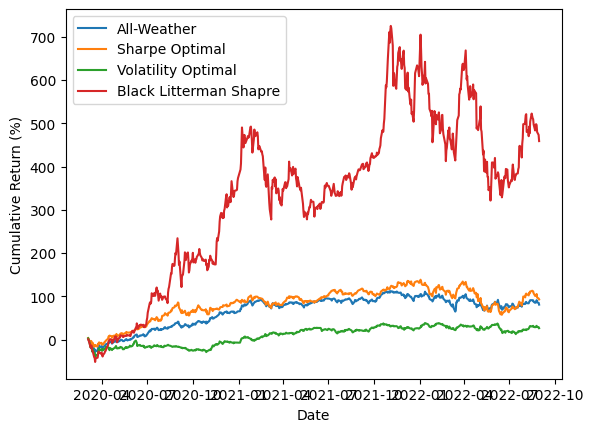

                       All-Weather  Sharpe Optimal  Volatility Optimal  \
Mean                      0.001100        0.001300            0.000600   
Volatility                0.020000        0.021100            0.022400   
Skewness                 -0.371100       -0.349800           -0.550700   
Kurtosis                  6.200500        2.597900           12.823000   
Annualized Return         0.125800        0.140400            0.048100   
Annualized Volatility     0.316864        0.334363            0.353426   
Sharpe Ratio              0.296000        0.324200            0.045600   

                       Black Litterman Shapre  
Mean                                 0.003700  
Volatility                           0.044400  
Skewness                             0.045800  
Kurtosis                             2.818000  
Annualized Return                    0.410700  
Annualized Volatility                0.702527  
Sharpe Ratio                         0.539100  


In [222]:

prior = black_litterman.market_implied_prior_returns(marketcap, delta, sigma)
# Expressing the views in a dictionary
viewdict = {'AMZN': 0.10,
            "BYDDY": 0.10,
            "TSLA": 0.80,
            "BABA": -0.30}

confidences = [0.2,
               0.6,
               0.8,
               0.7]

bl = BlackLittermanModel(sigma, pi=prior,
                         absolute_views=viewdict, view_confidences=confidences)

ret = bl.bl_returns()
sigma_bl = bl.bl_cov()
ef = EfficientFrontier(ret, sigma_bl)
ef.max_sharpe()
cleaned_weights = ef.clean_weights()

future_return['Black Litterman Sharpe'] = 0

for columns in future_return:
    if columns != 'All-Weather' and columns != 'Volatility Optimal' and columns != 'Sharpe Optimal'\
            and columns != 'Black Litterman Sharpe':
        future_return['Black Litterman Shapre'] =future_return['Black Litterman Sharpe'] + future_return[columns] * cleaned_weights[columns]

compare(future_return[['All-Weather', 'Sharpe Optimal', 'Volatility Optimal', 'Black Litterman Shapre']])

## We can see that with the views and the confidence on those views, the allocation provided
## by the Black Litterman model significantly outperforms in the testing period.

